# <font color=blue>Assignments for "Data Cleaning - Outliers"</font>

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)


In [2]:
states = pd.read_csv("../../data/EDA/states_all.csv",parse_dates=['YEAR'])

In [3]:
variables=states.columns[3:-1]

var_null=states.isnull().sum()
var_missing=var_null[var_null!=0].index

states_median_imputation=states.copy()

for i in range(0,(len(var_missing))): 
    states_median_imputation[var_missing[i]].fillna(states_median_imputation[var_missing[i]].median(),inplace=True)


**(1)** See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

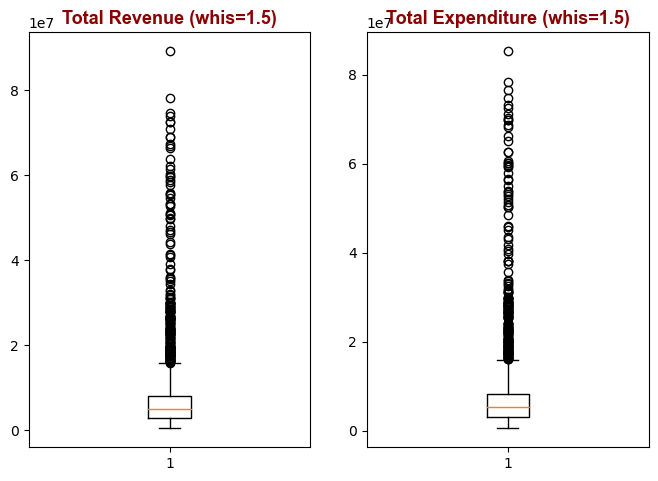

In [4]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,2,1)
plt.boxplot(states_median_imputation.TOTAL_REVENUE)
plt.title("Total Revenue (whis=1.5)", fontdict=title_font)

plt.subplot(1,2,2)
plt.boxplot(states_median_imputation.TOTAL_EXPENDITURE)
plt.title("Total Expenditure (whis=1.5)", fontdict=title_font)

plt.show()

**Z-Scores:**

In [5]:
z_scores = zscore(states_median_imputation["TOTAL_REVENUE"])
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 164
------
Threshold value: 2
Number of Outliers: 70
------
Threshold value: 3
Number of Outliers: 43
------
Threshold value: 4
Number of Outliers: 33
------


In [6]:
z_scores = zscore(states_median_imputation["TOTAL_EXPENDITURE"])
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 159
------
Threshold value: 2
Number of Outliers: 67
------
Threshold value: 3
Number of Outliers: 44
------
Threshold value: 4
Number of Outliers: 35
------


**Tukey Method:**

In [7]:
q75, q25 = np.percentile(states_median_imputation["TOTAL_REVENUE"].dropna(), [75 ,25])
IQR = q75 - q25

In [8]:
threshold_values=[]
for threshold_value in np.arange(1,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((states_median_imputation["TOTAL_REVENUE"] > max_value)| (states_median_imputation["TOTAL_REVENUE"].dropna() < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1.0,246
1,1.5,195
2,2.0,161
3,2.5,132
4,3.0,111
5,3.5,90
6,4.0,70
7,4.5,54


In [9]:
q75, q25 = np.percentile(states_median_imputation["TOTAL_EXPENDITURE"].dropna(), [75 ,25])
IQR = q75 - q25

In [10]:
threshold_values=[]
for threshold_value in np.arange(1,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((states_median_imputation["TOTAL_EXPENDITURE"] > max_value)| (states_median_imputation["TOTAL_EXPENDITURE"] < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1.0,246
1,1.5,195
2,2.0,160
3,2.5,134
4,3.0,109
5,3.5,95
6,4.0,67
7,4.5,56


**(2)** If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

**WINSORIZE:**

In [11]:
winsorize_revenue= winsorize(np.array(states_median_imputation['TOTAL_REVENUE']), (0.10, 0.10))

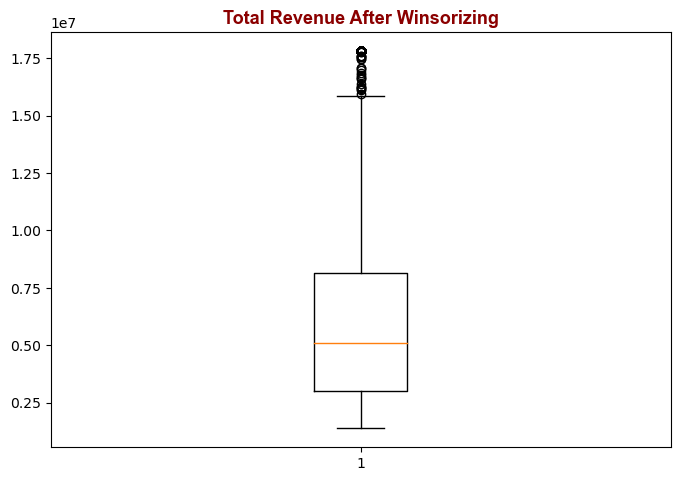

In [12]:
plt.boxplot(winsorize_revenue)
plt.title("Total Revenue After Winsorizing", fontdict=title_font)
plt.show()

In [13]:
winsorize_expenditure= winsorize(np.array(states_median_imputation['TOTAL_EXPENDITURE']), (0.10, 0.10))

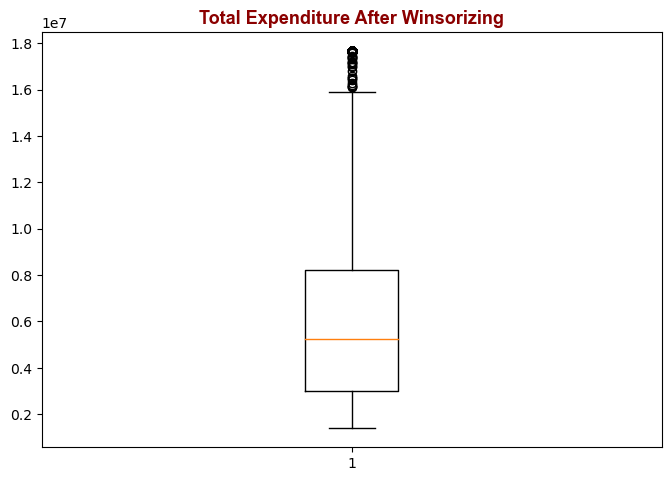

In [14]:
plt.boxplot(winsorize_expenditure)
plt.title("Total Expenditure After Winsorizing", fontdict=title_font)
plt.show()

**LOG-TRANSFORMATION:**

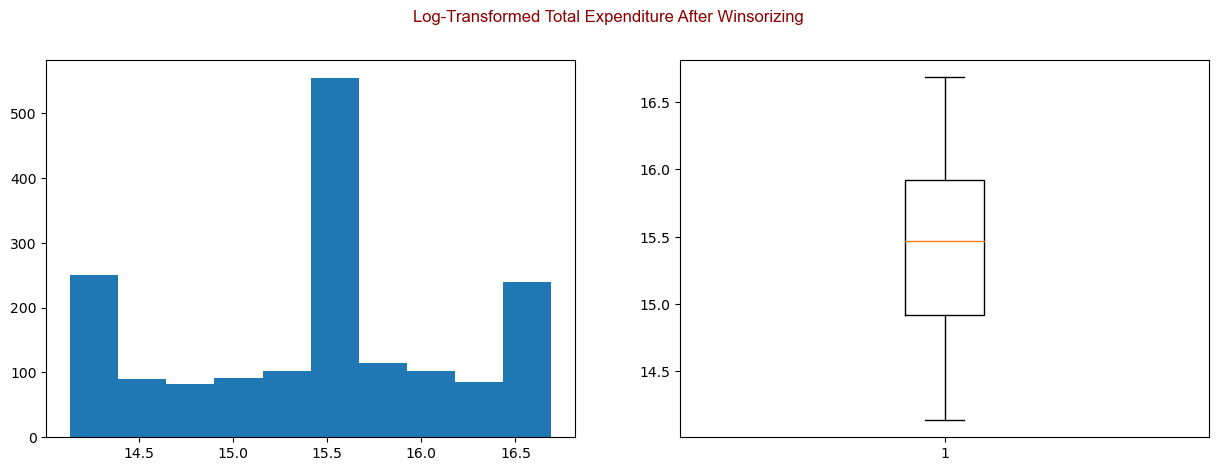

In [15]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(np.log(winsorize_expenditure))

plt.subplot(1,2,2)
log_expenditure=np.log(winsorize_expenditure)
plt.boxplot(log_expenditure)

plt.suptitle('Log-Transformed Total Expenditure After Winsorizing',fontdict=title_font)
plt.show()

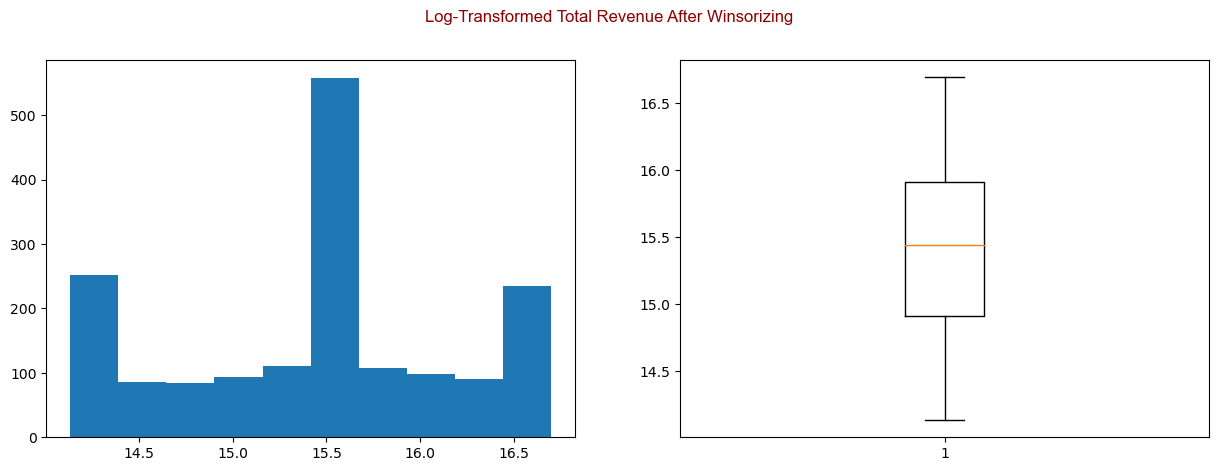

In [16]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(np.log(winsorize_revenue))

plt.subplot(1,2,2)
log_revenue=np.log(winsorize_revenue)
plt.boxplot(log_revenue)

plt.suptitle('Log-Transformed Total Revenue After Winsorizing',fontdict=title_font)
plt.show()

**(3)** Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [17]:
budget_deficit=states_median_imputation.TOTAL_REVENUE-states_median_imputation.TOTAL_EXPENDITURE

Text(0.5, 1.0, 'Budget Deficit (whis=1.5)')

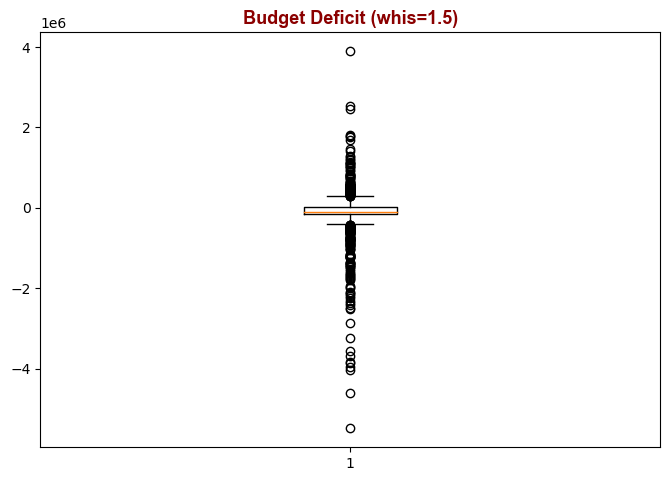

In [18]:
plt.boxplot(budget_deficit)
plt.title("Budget Deficit (whis=1.5)", fontdict=title_font)

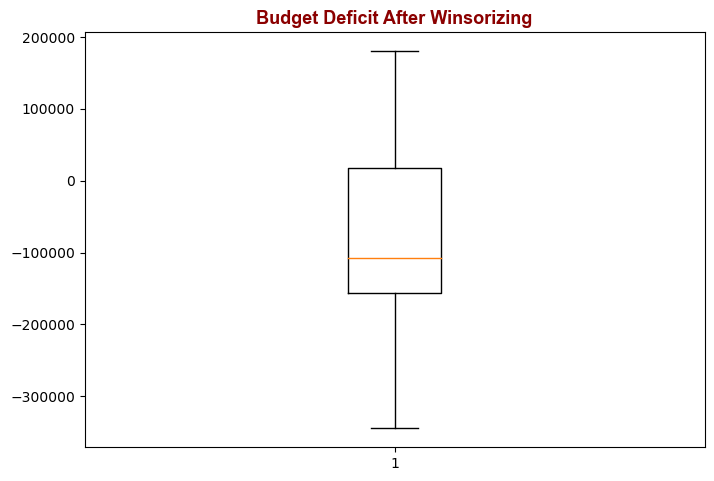

In [19]:
winsorize_budget= winsorize(np.array(budget_deficit), (0.10, 0.10))
plt.boxplot(winsorize_budget)
plt.title("Budget Deficit After Winsorizing", fontdict=title_font)
plt.show()

**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

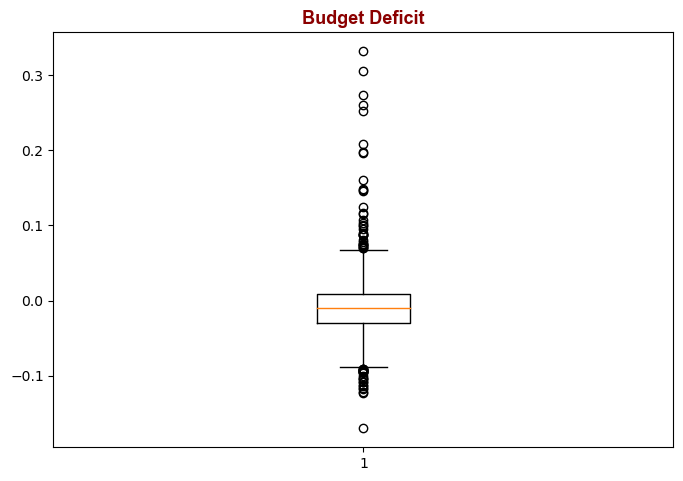

In [20]:
log_winsorize_budget_deficit=log_revenue-log_expenditure
plt.boxplot(log_winsorize_budget_deficit)
plt.title("Budget Deficit", fontdict=title_font)
plt.show()

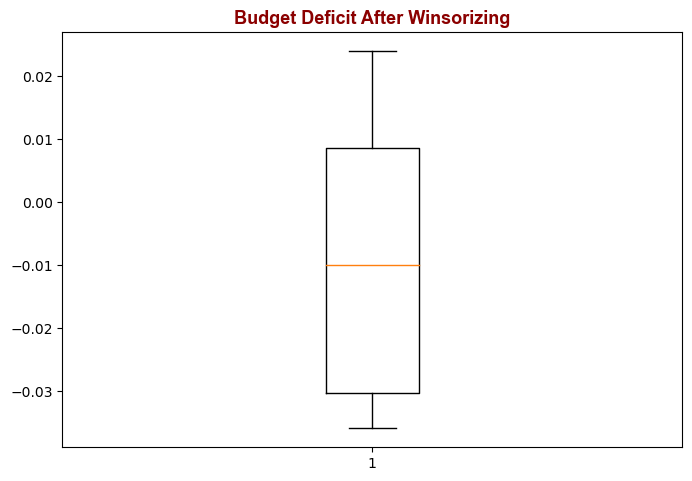

In [21]:
winsorize_budget2= winsorize(np.array(log_winsorize_budget_deficit), (0.10, 0.10))
plt.boxplot(winsorize_budget2)
plt.title("Budget Deficit After Winsorizing", fontdict=title_font)
plt.show()

**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

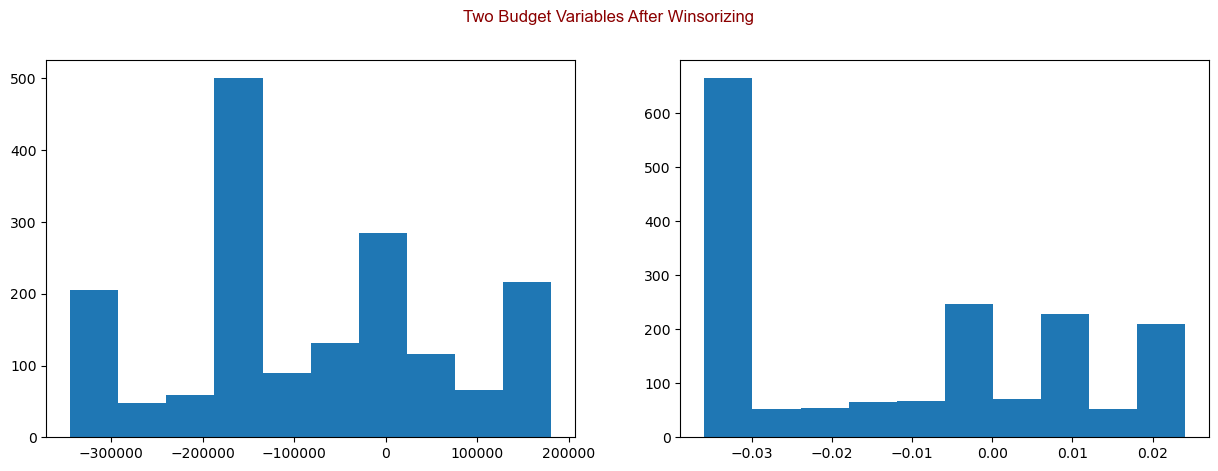

In [22]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(winsorize_budget)

plt.subplot(1,2,2)
plt.hist(winsorize_budget2)

plt.suptitle('Two Budget Variables After Winsorizing',fontdict=title_font)
plt.show()

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

In my opinion, I will choose the method I applied in the third question.